<p>Odesa Mechnikov National University</p>
<p>Mykola Zaitsev, Diploma work</p>

$$ A_m = - \frac{G}{2}(m+1) ||U_m||^2$$

$$ D_{mn} = \frac{G}{2\pi} \int_{-1}^{1} \sqrt{1-y^2} U_m(y) \int_{-1}^{1} \tilde{K}(y,n) \sqrt{1-\eta^2} U_n(\eta) \,d \eta \,d y$$

$$ f_m = \int_{-1}^{1} \tilde{f}(y) \sqrt{1-y^2} U_m(y)\,d y $$

$$ A_m c_m + \sum_{n=0}^{\infty} D_{mn} c_n = f_n $$

$$ \tilde{f}(y) = \frac{c_1-c_0}{2} f \left( \frac{(c_1-c_0)y+(c_1+c_0)}{2} \right) $$

$$ \tilde{K}(y, \eta) = \frac{(c_1-c_0)^2}{4} K \left( \frac{(c_1-c_0)y+(c_1+c_0)}{2}, \frac{(c_1-c_0)\eta+(c_1+c_0)}{2} \right) $$

$$ K(y, \eta) = \int_{0}^{\infty} \frac{e^{-\alpha(\eta+y)} + e^{-\alpha(2a+\eta-y)} - e^{-\alpha(2a-\eta-y)} + e^{-\alpha(2a-\eta+y)} }{1+e^{-2 \alpha a}} \alpha \,d \alpha $$

$$ f(y) = q(y) - \frac{1}{\pi} \int_{- \infty}^{\infty} p(\xi) \left( \frac{-2\xi}{\xi^2+(a+y)^2} - \frac{-2\xi}{\xi^2+(a-y)^2} \right) \,d \xi + \frac{2}{\pi} \int_{- \infty}^{\infty} p(\xi) \left( \int_{0}^{A} \frac{e^{-\alpha(\eta+y)} - e^{-\alpha(\eta-y)}}{\alpha(1+e^{-2 \alpha a})} \alpha sin{\alpha \xi} \,d \alpha - \int_{0}^{A} \frac{e^{-\alpha(\eta+y)} - e^{-\alpha(\eta-y)}}{\alpha} \alpha sin{\alpha \xi} \,d \alpha \right) \,d \xi $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import fixed_quad

def p(x):
    return np.where((x > -1) & (x < 1), (x+1)**2, 0)

    
def q(y):
    return np.where((y > -1) & (y < 1), np.cos(y), 0)


A = 50.0
a = 10.0 
G = 79.3 * 1000000000

$$ K(y, \eta) = \int_{0}^{\infty} \frac{e^{-\alpha(\eta+y)} + e^{-\alpha(2a+\eta-y)} - e^{-\alpha(2a-\eta-y)} + e^{-\alpha(2a-\eta+y)} }{1+e^{-2 \alpha a}} \alpha \,d \alpha $$

In [2]:
def integrand_k(alpha, y, eta):
    return (np.exp(-alpha * (eta + y)) + 
            np.exp(-alpha * (2*a + eta - y)) - 
            np.exp(-alpha * (2*a - eta - y)) + 
            np.exp(-alpha * (2*a - eta + y))) * alpha / (1 + np.exp(-2 * alpha * a))

def K(y, eta):
    integral_value, _ = quad(integrand_k, 0, np.inf, args=(y, eta))
    return integral_value

print(K(1, 1))

0.24985544587455985


$$ f(y) = q(y) - \frac{1}{\pi} \int_{- \infty}^{\infty} p(\xi) \left( \frac{-2\xi}{\xi^2+(a+y)^2} - \frac{-2\xi}{\xi^2+(a-y)^2} \right) \,d \xi + \frac{2}{\pi} \int_{- \infty}^{\infty} p(\xi) \left( \int_{0}^{A} \frac{e^{-\alpha(a+y)} - e^{-\alpha(a-y)}}{\alpha(1+e^{-2 \alpha a})} \alpha sin{\alpha \xi} \,d \alpha - \int_{0}^{A} \frac{e^{-\alpha(a+y)} - e^{-\alpha(a-y)}}{\alpha} \alpha sin{\alpha \xi} \,d \alpha \right) \,d \xi $$

In [3]:
def first_integrand(xi, y):
    return p(xi) * (-2 * xi / (xi**2 + (a + y)**2) - (-2 * xi / (xi**2 + (a - y)**2)))

def second_inner_integrand(alpha, y, xi):
    return ((np.exp(-alpha * (a + y)) - np.exp(-alpha * (a - y))) / (alpha * (1 + np.exp(-2 * alpha *a)))) * alpha * np.sin(alpha * xi)

def third_inner_integrand(alpha, y, xi):
    return ((np.exp(-alpha * (a + y)) - np.exp(-alpha * (a - y))) / alpha) * alpha * np.sin(alpha * xi)

def second_outer_integrand(xi, y):
    inner_integral_1, _ = quad(second_inner_integrand, 0, A, args=(y,xi))
    inner_integral_2, _ = quad(third_inner_integrand, 0, A, args=(y,xi))
    return p(xi) * (inner_integral_1 - inner_integral_2)

def f(y):
    first_integral, _ = quad(first_integrand, -1, 1, args=(y))
    second_integral, _ = quad(second_outer_integrand, -1, 1, args=(y))
    return q(y) - (1 / np.pi) * first_integral + (2 / np.pi) * second_integral

print(f(0.5))

0.8759494691398335


$$ \tilde{f}(y) = \frac{c_1-c_0}{2} f \left( \frac{(c_1-c_0)y+(c_1+c_0)}{2} \right) $$

$$ \tilde{K}(y, \eta) = \frac{(c_1-c_0)^2}{4} K \left( \frac{(c_1-c_0)y+(c_1+c_0)}{2}, \frac{(c_1-c_0)\eta+(c_1+c_0)}{2} \right) $$

In [4]:
c0 = 4.0
c1 = 6.0

def f_t(y):
    return (c1-c0)/2 * f(((c1-c0)*y+(c1+c0))/2)

def K_t(y, eta):
    return ((c1-c0)**2)/4 * K(((c1-c0)*y+(c1+c0))/2, ((c1-c0)*eta+(c1+c0))/2)

print(f_t(1))
print(K_t(1, 1))

-0.047147387256085964
-0.004317313357953829


In [5]:
from scipy.special import chebyu
from scipy.special import eval_chebyu

$$ A_m = - \frac{G}{2}(m+1) ||U_m||^2$$

In [6]:
def Am(m):
    return -G/2 * (m+1) * np.pi/2

print(Am(1))

-124564148714.8353


$$ f_m = \int_{-1}^{1} \tilde{f}(y) \sqrt{1-y^2} U_m(y)\,d y $$

In [7]:
def integrand_fm(y, m):
    return f_t(y) * np.sqrt(1 - y**2) * eval_chebyu(m, y)

def fm(m):
    result, _ = quad(integrand_fm, -1, 1, args=(m,))
    return result

print(fm(1))

-0.010863688142922689


$$ D_{mn} = \frac{G}{2\pi} \int_{-1}^{1} \sqrt{1-y^2} U_m(y) \int_{-1}^{1} \tilde{K}(y,n) \sqrt{1-\eta^2} U_n(\eta) \,d \eta \,d y$$

In [8]:
def inner_integrand_D(y, eta, n):
    return K_t(y, eta) * np.sqrt(1 - eta**2) * eval_chebyu(n, eta)

def inner_integral_D(y, n):
    result, _ = quad(inner_integrand_D, -1, 1, args=(y,n))
    return result

def integrand_D(y, n, m):
    return np.sqrt(1 - y**2) * eval_chebyu(m, y) * inner_integral_D(y, n)

def Dmn(m, n):
    result, _ = quad(integrand_D, -1, 1, args=(m, n))
    return (G / (2 * np.pi)) * result

print(Dmn(1, 1))

111457631.69824913


$$ A_m c_m + \sum_{n=0}^{\infty} D_{mn} c_n = f_n $$

In [9]:
n = 10
m = 10
M = np.zeros((m, n))

for i in range(0, m):  
    for j in range(0, n):
        if j == i:
                M[i][j] = Dmn(i, j) + Am(i)
        else:
                M[i][j] = Dmn(i, j)
print(M) 

[[-6.21430287e+10 -5.37543083e+07 -2.75880205e+07  1.51092269e+07
  -4.04621261e+06  2.64939371e+06 -1.33773073e+06  9.48603824e+05
  -6.07100591e+05  4.54552483e+05]
 [-5.37543083e+07 -1.24452691e+11 -3.86450814e+07 -3.16342331e+07
   1.77586206e+07 -5.38394334e+06  3.59799754e+06 -1.94483132e+06
   1.40315631e+06 -9.33800470e+05]
 [-2.75880205e+07 -3.86450814e+07 -1.86738812e+11 -3.59956877e+07
  -3.29719638e+07  1.87072244e+07 -5.99104393e+06  4.05255002e+06
  -2.27153120e+06  1.65737889e+06]
 [ 1.51092269e+07 -3.16342331e+07 -3.59956877e+07 -2.49022224e+11
  -3.50470839e+07 -3.35790644e+07  1.91617769e+07 -6.31774381e+06
   4.30677260e+06 -2.46748997e+06]
 [-4.04621261e+06  1.77586206e+07 -3.29719638e+07 -3.50470839e+07
  -3.11304905e+11 -3.45925314e+07 -3.39057643e+07  1.94159995e+07
  -6.51370257e+06  4.46368866e+06]
 [ 2.64939371e+06 -5.38394334e+06  1.87072244e+07 -3.35790644e+07
  -3.45925314e+07 -3.73587306e+11 -3.43383088e+07 -3.41017230e+07
   1.95729156e+07 -6.64047625e+06

In [10]:
n = 10
m = 10

F = np.zeros(m)
for i in range(0, m):
    F[i] = fm(i)
    
print(F)

[-4.68029432e-02 -1.08636881e-02 -1.52828247e-03 -2.01149741e-04
 -2.40437305e-05 -2.75635894e-06 -3.03662103e-07 -3.24996601e-08
 -3.39002881e-09 -3.40216472e-10]


In [11]:
M8 = M[:8, :8]
F8 = F[:8]
M8

array([[-6.21430287e+10, -5.37543083e+07, -2.75880205e+07,
         1.51092269e+07, -4.04621261e+06,  2.64939371e+06,
        -1.33773073e+06,  9.48603824e+05],
       [-5.37543083e+07, -1.24452691e+11, -3.86450814e+07,
        -3.16342331e+07,  1.77586206e+07, -5.38394334e+06,
         3.59799754e+06, -1.94483132e+06],
       [-2.75880205e+07, -3.86450814e+07, -1.86738812e+11,
        -3.59956877e+07, -3.29719638e+07,  1.87072244e+07,
        -5.99104393e+06,  4.05255002e+06],
       [ 1.51092269e+07, -3.16342331e+07, -3.59956877e+07,
        -2.49022224e+11, -3.50470839e+07, -3.35790644e+07,
         1.91617769e+07, -6.31774381e+06],
       [-4.04621261e+06,  1.77586206e+07, -3.29719638e+07,
        -3.50470839e+07, -3.11304905e+11, -3.45925314e+07,
        -3.39057643e+07,  1.94159995e+07],
       [ 2.64939371e+06, -5.38394334e+06,  1.87072244e+07,
        -3.35790644e+07, -3.45925314e+07, -3.73587306e+11,
        -3.43383088e+07, -3.41017230e+07],
       [-1.33773073e+06,  3.597997

In [12]:
c8 = np.linalg.solve(M8, F8)
c10 = np.linalg.solve(M, F)
print(c8) 
print(c10) 

[ 7.53070131e-13  8.69637338e-14  8.05463853e-15  8.41226761e-16
  7.14591818e-17  1.17864894e-17 -9.77019650e-19  1.21665962e-18]
[ 7.53070131e-13  8.69637338e-14  8.05463855e-15  8.41226746e-16
  7.14592010e-17  1.17864492e-17 -9.76951284e-19  1.21667175e-18
 -6.18639668e-19  4.38270323e-19]


In [14]:
eps = 0.01

for i in range (10):
    if i<8:
        if abs(c8[i]-c10[i])<eps:
            print("c",[i], "- convergence criterion is satisfied")
        else:
            print("c",[i], "- convergence criterion is not satisfied")
    else:
        if abs(c10[i])<eps:
            print("c",[i], "- convergence criterion is satisfied")
        else:
            print("c",[i], "- convergence criterion is not satisfied")

c [0] - convergence criterion is satisfied
c [1] - convergence criterion is satisfied
c [2] - convergence criterion is satisfied
c [3] - convergence criterion is satisfied
c [4] - convergence criterion is satisfied
c [5] - convergence criterion is satisfied
c [6] - convergence criterion is satisfied
c [7] - convergence criterion is satisfied
c [8] - convergence criterion is satisfied
c [9] - convergence criterion is satisfied


$$ \tilde{\chi}(\eta) = \sum_{n=0}^{\infty} c_n \sqrt{1-\eta^2} U_n(\eta)$$

In [18]:
def chi_t(eta):    
    value = 0
    for n in range(10):
        value += c10[n] * np.sqrt(1 - eta**2) * eval_chebyu(n, eta)
        
    return value

$$ \tilde{\chi}(\eta) =  \chi \left( \frac{(c_1-c_0)\eta+(c_1+c_0)}{2} \right) $$

In [16]:
def chi(eta):    
    return chi_t((2*eta-(c1+c0))/(c1-c0))

/var/folders/9t/nk8b_9113bq5tt6ts3tq3sd80000gn/T/ipykernel_51179/898827762.py:4: RuntimeWarning: invalid value encountered in sqrt
  value += c10[n] * np.sqrt(1 - eta**2) * eval_chebyu(n, eta)


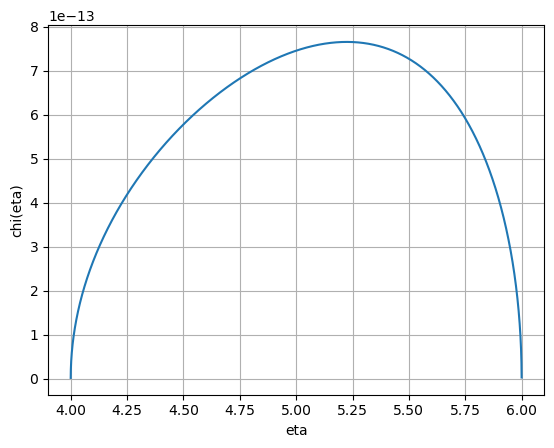

In [19]:
import matplotlib.ticker as ticker
eta = np.linspace(0, 10, 1000000)

func_values = []
for eta_val in eta:
    func_values.append(chi(eta_val))

# Plot the function
plt.plot(eta, func_values)
plt.xlabel('eta')
plt.ylabel('chi(eta)')
plt.grid(True)
plt.show()

$$ w(x,y)= \frac{1}{2\pi}\int_{c_0}^{c_1}  \chi (\eta) \left[ \frac{x}{(y-\eta)^2+x^2} + \int_{0}^{\infty} \frac{e^{-\alpha(\eta+y)} + e^{-\alpha(2a+\eta-y)} - e^{-\alpha(2a-\eta-y)} + e^{-\alpha(2a-\eta+y)}}{1+e^{-2\alpha a}} sin(\alpha x) \,d\alpha \right]  \,d\eta  +  \\ \\ 
 + \frac{1}{\pi G} \int_{-\infty}^{\infty} p(\xi) ln \frac{(\xi-x)^2+(a+y)^2}{(\xi-x)^2+(a-y)^2} \,d\xi +
\\ \\
+  \frac{2}{\pi G} \int_{-\infty}^{\infty} p(\xi) \left( \int_{0}^{A}  \frac{e^{-\alpha(a+y)} - e^{-\alpha(a-y)}}{\alpha(1+e^{-2\alpha a})} cos(\alpha (\xi-x)) \,d\alpha -  \int_{0}^{A}  \frac{e^{-\alpha(a+y)} - e^{-\alpha(a-y)}}{\alpha} cos(\alpha (\xi-x)) \,d\alpha \right) \,d\xi
$$

In [86]:
A=50
a=10
from scipy import integrate

def integrand1_alpha(alpha, eta, x, y):
        numerator = np.exp(-alpha * (eta + y)) + np.exp(-alpha * (2 * a + eta - y)) - \
                    np.exp(-alpha * (2 * a - eta - y)) + np.exp(-alpha * (2 * a - eta + y))
        denominator = 1 + np.exp(-2 * alpha * a)
        return numerator / denominator * np.sin(alpha * x)

def integrand1(eta, x, y):
    term1 = x / ((y - eta)**2 + x**2)
    term2, _ = quad(integrand1_alpha, 0, np.inf, args=(eta, x, y))
    return chi(eta) * (term1 + term2)

def integrand2(xi, x, y):
    return p(xi) * np.log(((xi - x)**2 + (a + y)**2) / ((xi - x)**2 + (a - y)**2))

def integrand3_inner(alpha, xi, x, y):
    term31 =  (np.exp(-alpha * (a + y)) - np.exp(-alpha * (a - y))) / (alpha * (1 + np.exp(-2 * alpha * a))) * np.cos(alpha * (xi - x))
    term32 = (np.exp(-alpha * (a + y)) - np.exp(-alpha * (a - y))) / alpha * np.cos(alpha * (xi - x)) 
    return term31 - term32
    
def integrand3_outer(xi, x, y):
        term1, _ = quad(integrand3_inner, 0, A, args=(xi, x, y)) 
        return p(xi) * (term1)


# The function w(x, y)
def w(x, y):
    integral1, _ = quad(integrand1, c0, c1, args=(x, y))
    integral2, _ = quad(integrand2, -np.inf, np.inf, args=(x, y))
    integral3, _ = quad(integrand3_outer, -np.inf, np.inf, args=(x, y))
    
    return (1/(2 * np.pi)) * integral1 + (1/(np.pi * G)) * integral2 + (2/(np.pi * G)) * integral3

In [87]:
print(w(-10,5))

1.3672209464606149e-11


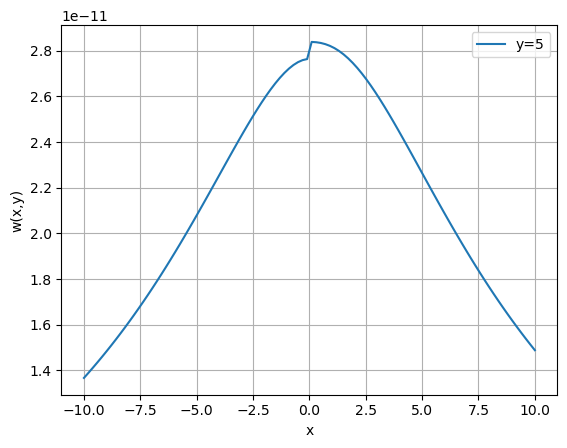

In [88]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

func_values = []
for x_val in x:
    func_values.append(w(x_val,5))

# Plot the function
plt.plot(x, func_values, label='y=5')
plt.xlabel('x')
plt.ylabel('w(x,y)')
plt.grid(True)
plt.legend()
plt.show()

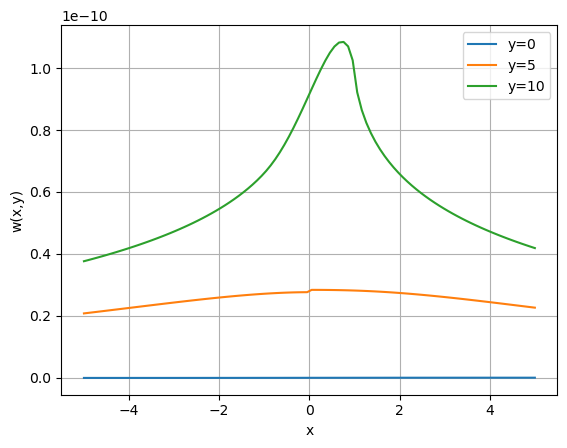

In [23]:
x = np.linspace(-5, 5, 100)

func_values1 = []
func_values2 = []
func_values3 = []

for x_val in x:
    func_values1.append(w(x_val,0))
    
for x_val in x:
    func_values2.append(w(x_val,5))
    
for x_val in x:
    func_values3.append(w(x_val,10))

# Plot the function
plt.plot(x, func_values1, label='y=0')
plt.plot(x, func_values2, label='y=5')
plt.plot(x, func_values3, label='y=10')
plt.xlabel('x')
plt.ylabel('w(x,y)')
plt.legend()
plt.grid(True)
plt.show()

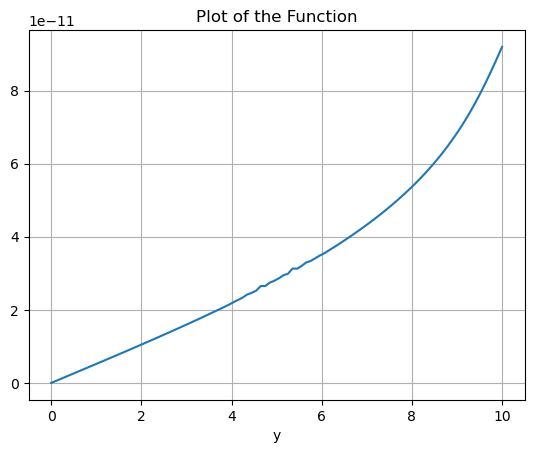

In [54]:
y = np.linspace(0, 10, 100)

func_values = []
for y_val in y:
    func_values.append(w(0.01, y_val))

# Plot the function
plt.plot(y, func_values)
plt.xlabel('y')
plt.title('Plot of the Function')
plt.grid(True)
plt.show()

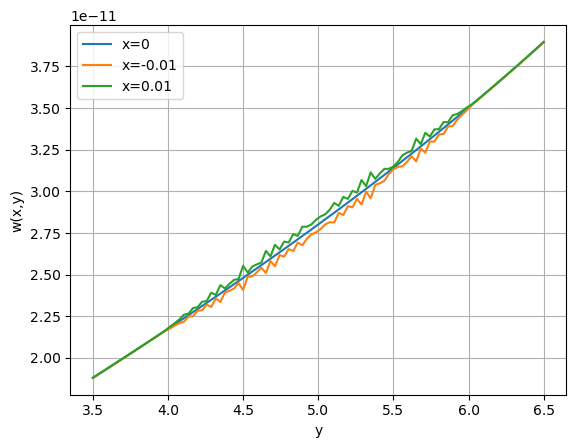

In [57]:
y = np.linspace(3.5, 6.5, 100)

func_values1 = []
func_values2 = []
func_values3 = []

for y_val in y:
    func_values1.append(w(0, y_val))

for y_val in y:
    func_values2.append(w(-0.01, y_val))
    
for y_val in y:
    func_values3.append(w(0.01, y_val))

# Plot the function
plt.plot(y, func_values1, label='x=0')
plt.plot(y, func_values2, label='x=-0.01')
plt.plot(y, func_values3, label='x=0.01')
plt.xlabel('y')
plt.ylabel('w(x,y)')
plt.legend()
plt.grid(True)
plt.show()

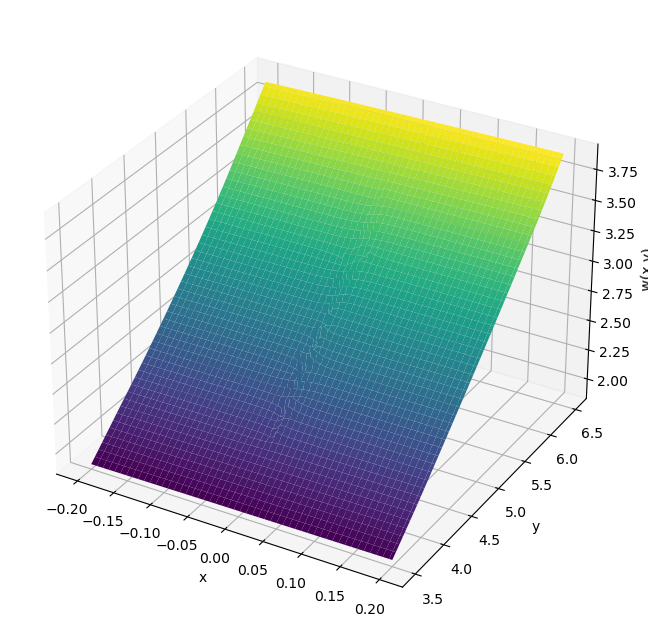

In [90]:
x = np.linspace(-0.2, 0.2, 100)
y = np.linspace(3.5, 6.5, 100)
X, Y = np.meshgrid(x, y)
func_values = np.zeros_like(X)


for i in range(len(x)):
    for j in range(len(y)):
        func_values[j, i] = w(x[i],y[j])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, func_values, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w(x,y) ')

plt.show()

$$ \tau_{xz}(x,y)= \frac{G}{2\pi}\int_{c_0}^{c_1}  \chi (\eta) \left[ \frac{(y-\eta)^2-x^2}{((y-\eta)^2+x^2)^2} + \int_{0}^{\infty} \frac{e^{-\alpha(\eta+y)} + e^{-\alpha(2a+\eta-y)} - e^{-\alpha(2a-\eta-y)} + e^{-\alpha(2a-\eta+y)}}{1+e^{-2\alpha a}} \alpha cos(\alpha x) \,d\alpha \right]  \,d\eta  +  \\ \\ 
 + \frac{1}{\pi} \int_{-\infty}^{\infty} p(\xi) \left( \frac{-2\xi+2x}{(\xi-x)^2+(a+y)^2} - \frac{-2\xi+2x}{(\xi-x)^2+(a-y)^2} \right)\,d\xi +
\\ \\
+  \frac{2}{\pi} \int_{-\infty}^{\infty} p(\xi) \left( \int_{0}^{A}  \frac{e^{-\alpha(a+y)} - e^{-\alpha(a-y)}}{\alpha(1+e^{-2\alpha a})} \alpha sin(\alpha (\xi-x)) \,d\alpha -  \int_{0}^{A}  \frac{e^{-\alpha(a+y)} - e^{-\alpha(a-y)}}{\alpha} \alpha sin(\alpha (\xi-x)) \,d\alpha \right) \,d\xi
$$

In [91]:
def p(x):
    return np.where((x > -1) & (x < 1), (x+1)**2, 0)

    
def q(y):
    return np.where((y > -1) & (y < 1), np.cos(y), 0)


A = 50.0
a = 10.0 
G = 79.3 * 1000000000

c0=4
c1=6

from scipy import integrate

def txintegrand1_alpha(alpha, eta, x, y):
        numerator = np.exp(-alpha * (eta + y)) + np.exp(-alpha * (2 * a + eta - y)) - \
                    np.exp(-alpha * (2 * a - eta - y)) + np.exp(-alpha * (2 * a - eta + y))
        denominator = 1 + np.exp(-2 * alpha * a)
        return numerator / denominator * alpha* np.cos(alpha * x)


def txintegrand1(eta, x, y):
    term1 = ((y - eta)**2 - x**2) / ((y - eta)**2 + x**2)**2
    term2, _ = quad(txintegrand1_alpha, 0, np.inf, args=(eta, x, y))
    
    return chi(eta) * (term1 + term2)

def txintegrand2(xi, x, y):
    return p(xi) * ((-2*xi + 2*x) / ((xi - x)**2 + (a + y)**2) - (-2*xi + 2*x) / ((xi - x)**2 + (a - y)**2))

def txintegrand3_inner(alpha, xi, x, y):
    term31 =  (np.exp(-alpha * (a + y)) - np.exp(-alpha * (a - y))) / (alpha * (1 + np.exp(-2 * alpha * a))) * np.sin(alpha * (xi - x))
    
    term32 = (np.exp(-alpha * (a + y)) - np.exp(-alpha * (a - y))) / alpha * np.sin(alpha * (xi - x)) 
    
    return term31 - term32
    
def txintegrand3_outer(xi, x, y):
    term1, _ = quad(txintegrand3_inner, 0, A, args=(xi, x, y))
    
    return p(xi) * (term1)


def txz(x, y):
    txintegral1, _ = quad(txintegrand1, c0, c1, args=(x, y))
    
    txintegral2, _ = quad(txintegrand2, -np.inf, np.inf, args=(x, y))
    
    txintegral3, _ = quad(txintegrand3_outer, -1, 1, args=(x, y))
    
    return (G/(2 * np.pi)) * txintegral1 + (1/(np.pi)) * txintegral2 + (2/(np.pi)) * txintegral3

In [92]:
print(txz(1,9))

-0.5479278923649935


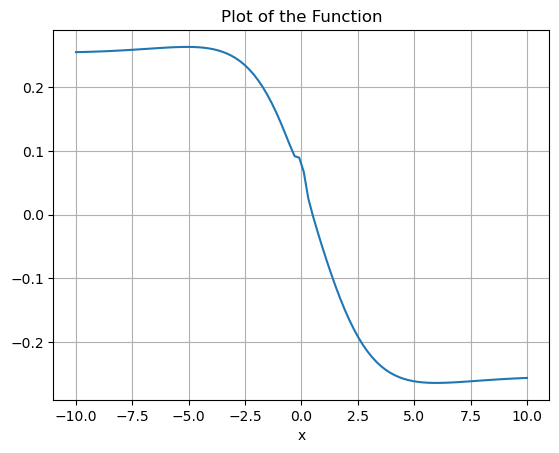

In [93]:
x = np.linspace(-10, 10, 100)
func_values = []
for x_val in x:
    func_values.append(txz(x_val,6))

# Plot the function
plt.plot(x, func_values)
plt.xlabel('x')
plt.title('Plot of the Function')
plt.grid(True)
plt.show()

/var/folders/9t/nk8b_9113bq5tt6ts3tq3sd80000gn/T/ipykernel_51179/4149963234.py:50: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  txintegral2, _ = quad(txintegrand2, -np.inf, np.inf, args=(x, y))


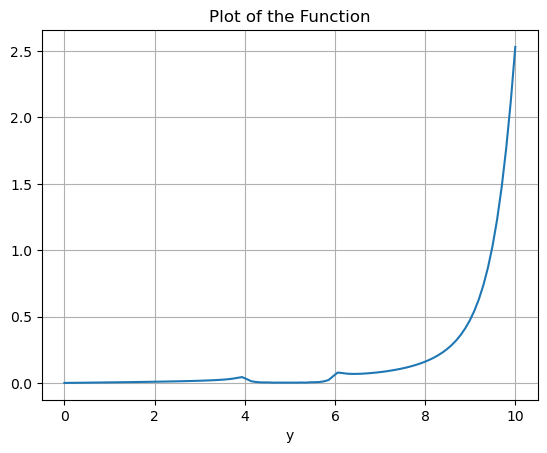

In [30]:
y = np.linspace(0, 10, 100)

func_values = []
for y_val in y:
    func_values.append(txz(0.1, y_val))

# Plot the function
plt.plot(y, func_values)
plt.xlabel('y')
plt.title('Plot of the Function')
plt.grid(True)
plt.show()

/var/folders/9t/nk8b_9113bq5tt6ts3tq3sd80000gn/T/ipykernel_51179/4149963234.py:50: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  txintegral2, _ = quad(txintegrand2, -np.inf, np.inf, args=(x, y))
/var/folders/9t/nk8b_9113bq5tt6ts3tq3sd80000gn/T/ipykernel_51179/4149963234.py:32: RuntimeWarning: invalid value encountered in double_scalars
  return p(xi) * ((-2*xi + 2*x) / ((xi - x)**2 + (a + y)**2) - (-2*xi + 2*x) / ((xi - x)**2 + (a - y)**2))
/var/folders/9t/nk8b_9113bq5tt6ts3tq3sd80000gn/T/ipykernel_51179/4149963234.py:50: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  txintegral2, _ = quad(txintegrand2, -np.inf, np.inf, args=(x, y))
/var/folders/9t/nk8b_9113bq5tt6ts3tq3sd80000gn/T/ipykernel_51179/4149963234.py:50: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improv

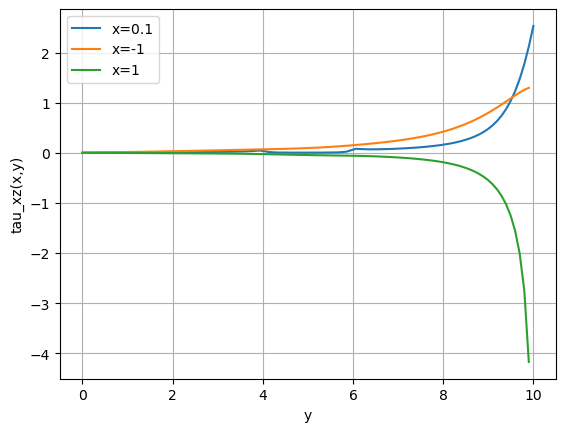

In [31]:
y = np.linspace(0, 10, 100)

func_values1 = []
func_values2 = []
func_values3 = []

for y_val in y:
    func_values1.append(txz(0.1, y_val))

for y_val in y:
    func_values2.append(txz(-1, y_val))
    
for y_val in y:
    func_values3.append(txz(1, y_val))

# Plot the function
plt.plot(y, func_values1, label='x=0.1')
plt.plot(y, func_values2, label='x=-1')
plt.plot(y, func_values3, label='x=1')
plt.xlabel('y')
plt.ylabel('tau_xz(x,y)')
plt.legend()
plt.grid(True)
plt.show()

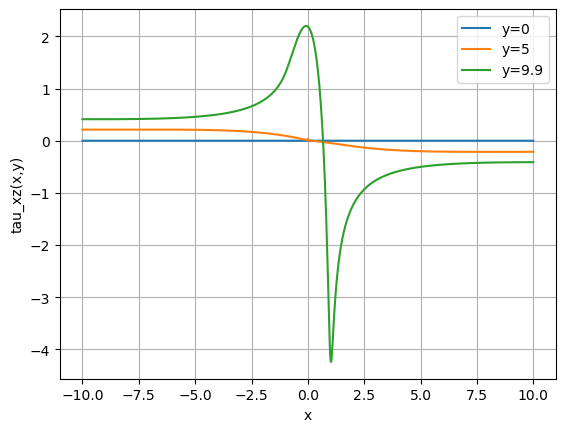

In [68]:
x = np.linspace(-10, 10, 1000)

func_values1 = []
func_values2 = []
func_values3 = []

for x_val in x:
    func_values1.append(txz(x_val,0))
    
for x_val in x:
    func_values2.append(txz(x_val,5))
    
for x_val in x:
    func_values3.append(txz(x_val,9.9))

# Plot the function
plt.plot(x, func_values1, label='y=0')
plt.plot(x, func_values2, label='y=5')
plt.plot(x, func_values3, label='y=9.9')
plt.xlabel('x')
plt.ylabel('tau_xz(x,y)')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/9t/nk8b_9113bq5tt6ts3tq3sd80000gn/T/ipykernel_51179/4149963234.py:26: RuntimeWarning: invalid value encountered in double_scalars
  term1 = ((y - eta)**2 - x**2) / ((y - eta)**2 + x**2)**2
/var/folders/9t/nk8b_9113bq5tt6ts3tq3sd80000gn/T/ipykernel_51179/4149963234.py:48: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  txintegral1, _ = quad(txintegrand1, c0, c1, args=(x, y))


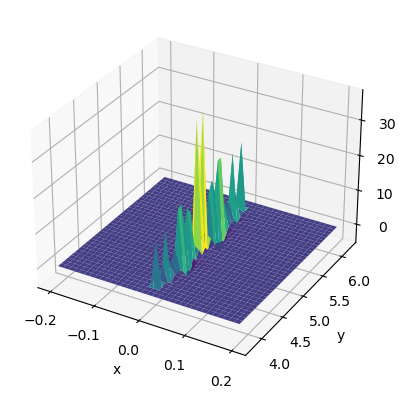

In [98]:
x = np.linspace(-0.2, 0.2, 35)
y = np.linspace(3.8, 6.2, 35)
X, Y = np.meshgrid(x, y)
func_values = np.zeros_like(X)


for i in range(len(x)):
    for j in range(len(y)):
        func_values[j, i] = txz(x[i],y[j])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, func_values, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('tau_xz(x,y)')

plt.show()

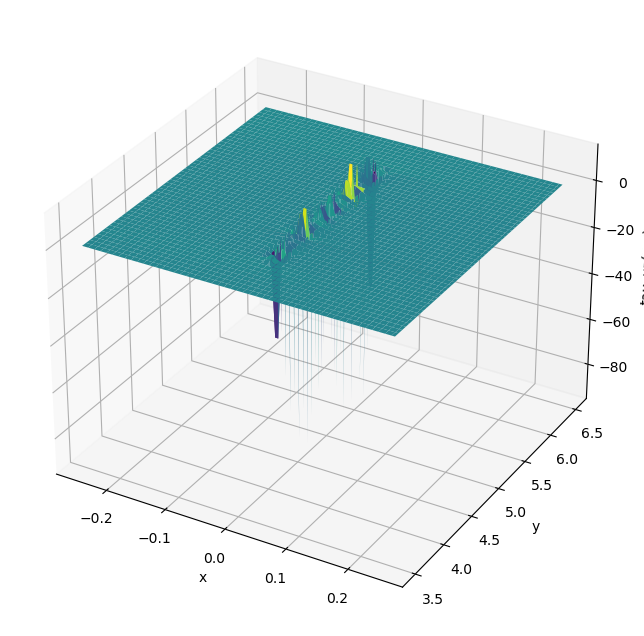

In [85]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, func_values, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('tau_xz(x,y)')

plt.show()

$$ \tau_{yz}(x,y)= \frac{1}{2\pi}\int_{c_0}^{c_1}  \chi (\eta) \left[ \frac{2x(y-\eta)}{((y-\eta)^2+x^2)^2} + \int_{0}^{\infty} \frac{-e^{-\alpha(\eta+y)} + e^{-\alpha(2a+\eta-y)} - e^{-\alpha(2a-\eta-y)} - e^{-\alpha(2a-\eta+y)}}{1+e^{-2\alpha a}} sin(\alpha x) \,d\alpha \right]  \,d\eta  +  \\ \\ 
 + \frac{1}{\pi} \int_{-\infty}^{\infty} p(\xi) \left( \frac{2(a+y)}{(\xi-x)^2+(a+y)^2} - \frac{2(a-y)}{(\xi-x)^2+(a-y)^2} \right) \,d\xi +
\\ \\
+  \frac{2}{\pi} \int_{-\infty}^{\infty} p(\xi) \left( \int_{0}^{A}  \alpha \frac{-e^{-\alpha(a+y)} - e^{-\alpha(a-y)}}{\alpha(1+e^{-2\alpha a})} cos(\alpha (\xi-x)) \,d\alpha -  \int_{0}^{A} \alpha  \frac{-e^{-\alpha(a+y)} - e^{-\alpha(a-y)}}{\alpha} cos(\alpha (\xi-x)) \,d\alpha \right) \,d\xi
$$

In [76]:
A=50
from scipy import integrate

def integrand1_alpha(alpha, eta, x, y):
        numerator = -np.exp(-alpha * (eta + y)) + np.exp(-alpha * (2 * a + eta - y)) - \
                    np.exp(-alpha * (2 * a - eta - y)) - np.exp(-alpha * (2 * a - eta + y))
        denominator = 1 + np.exp(-2 * alpha * a)
        return numerator / denominator * np.sin(alpha * x)

def integrand1(eta, x, y):
    term1 = 2*x*(y - eta) / ((y - eta)**2 + x**2)**2 
    term2, _ = quad(integrand1_alpha, 0, np.inf, args=(eta, x, y))
    
    return chi(eta) * (term1 + term2)

def integrand2(xi, x, y):
    return p(xi) * ((2*(a+y)) / ((xi - x)**2 + (a + y)**2) - (2*(a-y)) / ((xi - x)**2 + (a - y)**2) )

def integrand3_inner(alpha, xi, x, y):
        return ((-np.exp(-alpha * (a + y)) - np.exp(-alpha * (a - y))) / (alpha * (1 + np.exp(-2 * alpha * a))) - \
    (-np.exp(-alpha * (a + y)) - np.exp(-alpha * (a - y))) / alpha) * alpha * np.cos(alpha * (xi - x))
    
def integrand3_outer(xi, x, y):
        term1, _ = quad(integrand3_inner, 0, A, args=(xi, x, y))
        return p(xi) * (term1)


# The function w(x, y)
def tyz(x, y):
    integral1, _ = quad(integrand1, c0, c1, args=(x, y))
    
    integral2, _ = quad(integrand2, -np.inf, np.inf, args=(x, y))
    
    integral3, _ = quad(integrand3_outer, -1, 1, args=(x, y))
    
    return (1/(G * np.pi)) * integral1 + (1/(np.pi)) * integral2 + (2/(np.pi)) * integral3

In [77]:
print(tyz(0,0))

0.0728217371848645


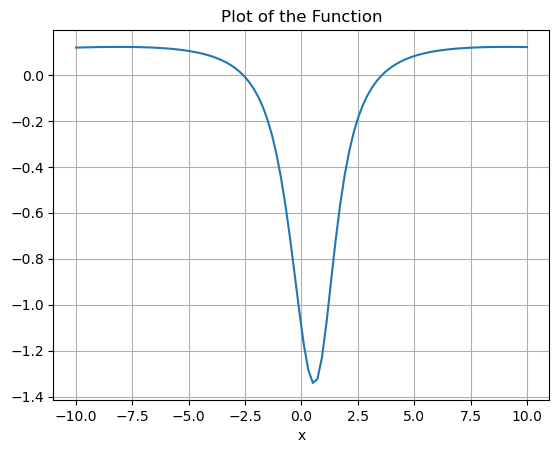

In [78]:
x = np.linspace(-10, 10, 100)
func_values = []
for x_val in x:
    func_values.append(tyz(x_val,9))

# Plot the function
plt.plot(x, func_values)
plt.xlabel('x')
plt.title('Plot of the Function')
plt.grid(True)
plt.show()

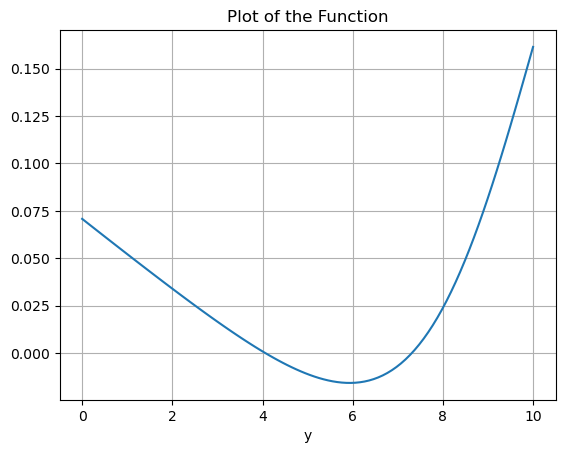

In [41]:
y = np.linspace(0, 10, 100)

func_values = []
for y_val in y:
    func_values.append(tyz(5, y_val))

# Plot the function
plt.plot(y, func_values)
plt.xlabel('y')
plt.title('Plot of the Function')
plt.grid(True)
plt.show()

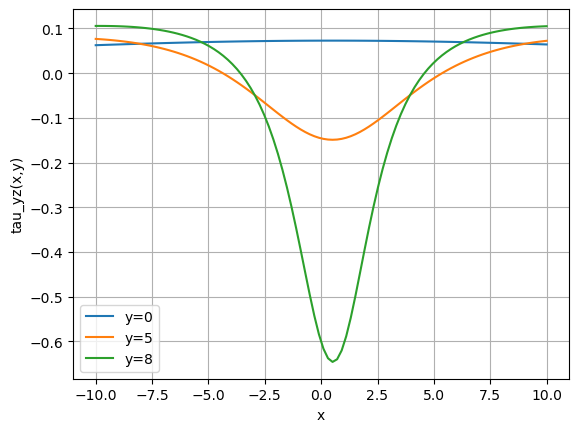

In [42]:
x = np.linspace(-10, 10, 100)

func_values1 = []
func_values2 = []
func_values3 = []

for x_val in x:
    func_values1.append(tyz(x_val,0))
    
for x_val in x:
    func_values2.append(tyz(x_val,5))
    
for x_val in x:
    func_values3.append(tyz(x_val,8))

# Plot the function
plt.plot(x, func_values1, label='y=0')
plt.plot(x, func_values2, label='y=5')
plt.plot(x, func_values3, label='y=8')
plt.xlabel('x')
plt.ylabel('tau_yz(x,y)')
plt.legend()
plt.grid(True)
plt.show()

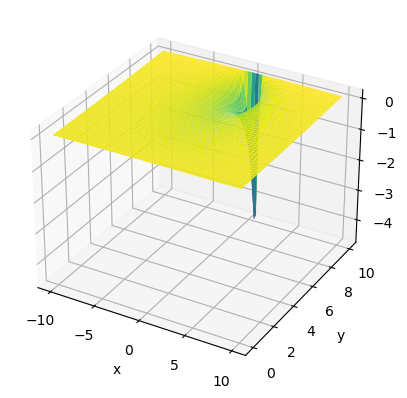

In [79]:
x = np.linspace(-10, 10, 100)
y = np.linspace(0, a, 100)
X, Y = np.meshgrid(x, y)
func_values = np.zeros_like(X)


for i in range(len(x)):
    for j in range(len(y)):
        func_values[j, i] = tyz(x[i],y[j])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, func_values, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('tau_xz(x,y)')

plt.show()

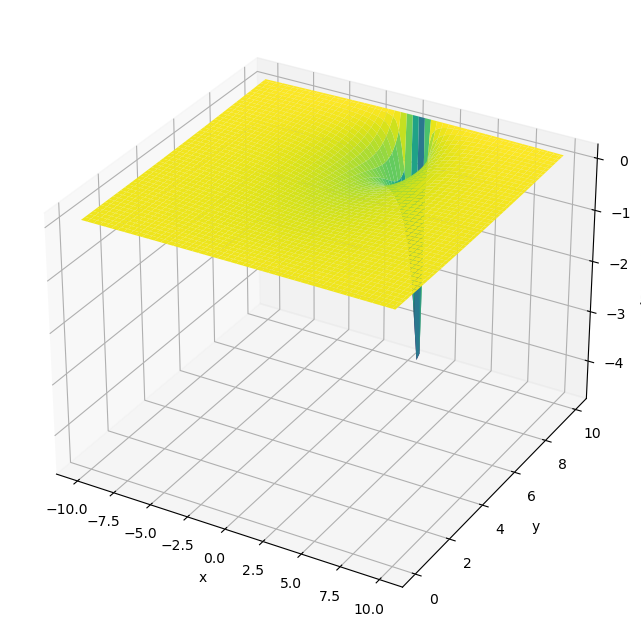

In [80]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, func_values, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('tau_xz(x,y)')

plt.show()

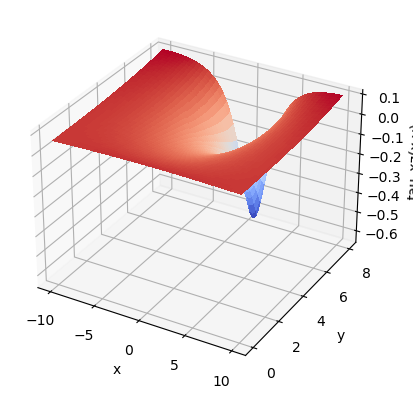

In [59]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, func_values, cmap=cm.coolwarm, linewidth=0, antialiased=False)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('tau_xz(x,y)')

plt.show()

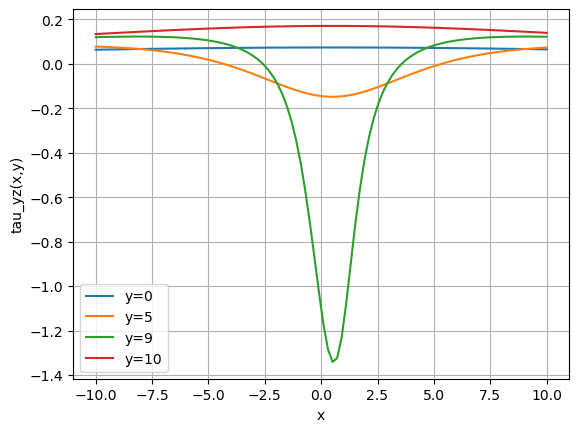

In [45]:
x = np.linspace(-10, 10, 100)

func_values1 = []
func_values2 = []
func_values3 = []
func_values4 = []

for x_val in x:
    func_values1.append(tyz(x_val,0))
    
for x_val in x:
    func_values2.append(tyz(x_val,5))
    
for x_val in x:
    func_values3.append(tyz(x_val,9))
    
for x_val in x:
    func_values4.append(tyz(x_val,10))

# Plot the function
plt.plot(x, func_values1, label='y=0')
plt.plot(x, func_values2, label='y=5')
plt.plot(x, func_values3, label='y=9')
plt.plot(x, func_values4, label='y=10')
plt.xlabel('x')
plt.ylabel('tau_yz(x,y)')
plt.legend()
plt.grid(True)
plt.show()